In [ ]:
pip install opencv-python

In [1]:
import matplotlib.pylab as plt
import numpy as np
import cv2
import pandas as pd
from scipy.stats import norm
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'cv2'

In [358]:
def activate_function(x):
    # Sigmoid activate function
    return 1 / (1 + np.exp(-x))

###################################################################

def neural_network(layers_number, input_data, weight):
    size = len(input_data)
    layers = np.zeros((layers_number + 1, size))
    layers[0] = input_data
    for i in range(layers_number):
        layers[i + 1] = mult(weight[i], layers[i])
    print (layers)
    output = (layers[layers_number] * weight[layers_number - 1][0]).sum()
    return output

###################################################################

def matrix_vector(matrix, vector):
    result = np.zeros(len(matrix))
    if (len(matrix[0]) != len(vector)):
        print ("ERROR")
    else:
        for i in range (len(matrix)):
            summ = 0
            for j in range(len(vector)):
                summ = summ + (matrix[i][j] * vector[j])
            result[i] = activate_function(summ)
    return result


In [360]:
class Neuron:
    
    def __init__(self, weights, bias, value):
        self.weights = weights
        self.bias = bias
        self.value = value
 
    def feedForward(self, input_data):
        self.value = np.dot(self.weights, input_data) + self.bias

###################################################################

class NeuralNetwork:
    
    def __init__(self, layer_data, size):
        self.size = size
        self.layer_data = layer_data
        
    def defineLayer(self, input_data, layer_size, weight, n):
        
        for i in range(layer_size):
            bias = 0 
            value = 1
            neuron = Neuron(weight[i], bias, value)
            neuron.feedForward(input_data)
            self.layer_data[n].append(neuron)
            
        self.layer_data.append([])
        
    def outPut(self, weight):
        return activate_function(np.dot(self.layer_data[self.size - 1], weight))

In [361]:
image = cv2.imread('C:/Users/dimap/source/repos/FIlters/Pictures/road.jpg')

h = len(image)
w = len(image[0])

image_gray = np.ones(h * w)
for i in range(h):
    for j in range(w):
        image_gray[i * w + j] = int(image[i][j][0] * 0.0721 + image[i][j][1] * 0.7154 + image[i][j][2] * 0.2125)
        
lambd = [[]]

In [392]:
Dx1 = np.array([1/2, -1/2, 0, 1/2, -1/2, 0, 0, 0, 0])
Dy1 = np.array([1/2, 1/2, 0, -1/2, -1/2, 0, 0, 0, 0])

Dx2 = np.array([0, 1/2, -1/2, 0, 1/2, -1/2, 0, 0, 0])
Dy2 = np.array([0, 1/2, 1/2, 0, -1/2, -1/2, 0, 0, 0])

Dx3 = np.array([0, 0, 0, 1/2, -1/2, 0, 1/2, -1/2, 0])
Dy3 = np.array([0, 0, 0, 1/2, 1/2, 0, -1/2, -1/2, 0])

Dx4 = np.array([0, 0, 0, 0, 1/2, -1/2, 0, 1/2, -1/2])
Dy4 = np.array([0, 0, 0, 0, 1/2, 1/2, 0, -1/2, -1/2])

weight_1 = np.array((Dx1, Dy1, Dx2, Dy2, Dx3, Dy3, Dx4, Dy4))

l1 = 200
l2 = 500
l_1 = []
l_2 = []
l_3 = []


lambda_min = np.ones((h - 2) * (w - 2))
lambda_1 = np.ones((h - 2) * (w - 2))
lambda_2 = np.ones((h - 2) * (w - 2))

########################################################################
for i in range(h - 2):
    for j in range(w - 2):
        input_layer = np.ones(9)
        for k in range(3):
            for l in range(3):
                input_layer[k * 3 + l] = image_gray[(i * w + j) + (k * w + l)]
                
        network_size = 3
        layer_data = [[]]
        netWork = NeuralNetwork(layer_data, network_size)
        
        layer_size_1 = 8
        netWork.defineLayer(input_layer, layer_size_1, weight_1, 0)
        
########################################################################

        input_data_1 = np.ones(layer_size_1)
        for t in range(layer_size_1):
            input_data_1[t] = netWork.layer_data[0][t].value
            
        lx1 = netWork.layer_data[0][0].value
        ly1 = netWork.layer_data[0][1].value

        lx2 = netWork.layer_data[0][2].value
        ly2 = netWork.layer_data[0][3].value

        lx3 = netWork.layer_data[0][4].value
        ly3 = netWork.layer_data[0][5].value

        lx4 = netWork.layer_data[0][6].value
        ly4 = netWork.layer_data[0][7].value
        

        weight_2 = np.array(([lx1, 0, 0, 0, 0, 0, 0, 0], [ly1, 0, 0, 0, 0, 0, 0, 0],
                             [0, ly1, 0, 0, 0, 0, 0, 0], [0, 0, lx2, 0, 0, 0, 0, 0],
                             [0, 0, ly2, 0, 0, 0, 0, 0], [0, 0, 0, ly2, 0, 0, 0, 0],
                             [0, 0, 0, 0, lx3, 0, 0, 0], [0, 0, 0, 0, ly3, 0, 0, 0],
                             [0, 0, 0, 0, 0, ly3, 0, 0], [0, 0, 0, 0, 0, 0, lx4, 0],
                             [0, 0, 0, 0, 0, 0, ly4, 0], [0, 0, 0, 0, 0, 0, 0, ly4]))
                
        layer_size_2 = 12
        netWork.defineLayer(input_data_1, layer_size_2, weight_2, 1)   
        
########################################################################
            
        input_data_2 = np.ones(layer_size_2)
        for t in range(layer_size_2):
            input_data_2[t] = netWork.layer_data[1][t].value
            
        weight_3 = np.array(([1/2, 0, 0, 1/2, 0, 0, 1/2, 0, 0, 1/2, 0, 0],
                             [0, 1/2, 0, 0, 1/2, 0, 0, 1/2, 0, 0, 1/2, 0],
                             [0, 0, 1/2, 0, 0, 1/2, 0, 0, 1/2, 0, 0, 1/2]))

        layer_size_3 = 3
        netWork.defineLayer(input_data_2, layer_size_3, weight_3, 2)
        
        
########################################################################
        
        a11 = netWork.layer_data[2][0].value
        a12 = netWork.layer_data[2][1].value
        a22 = netWork.layer_data[2][2].value
        
        lambda1 = ((a11 + a22) / 2) + np.sqrt(((a11 + a22) / 2) ** 2 - (a11 * a22 - a12 * a12))
        lambda2 = ((a11 + a22) / 2) - np.sqrt(((a11 + a22) / 2) ** 2 - (a11 * a22 - a12 * a12))
        
        if (lambda1 < lambda2):
            lambda_min = lambda1
        else:
            lambda_min = lambda2
            
        #####################################
        
        if (lambda_min < l1):
            l_1.append([j, i, lambda_min])
        else:
            l_1.append([0, 0, 0])
            
        if (lambda_min < l2) and (lambda_min >= l1):
            l_2.append([j, i, lambda_min])
        else:
            l_2.append([0, 0, 0])
        
        if (lambda_min >= l2):
            l_3.append([j, i, lambda_min])
        else:
            l_3.append([0, 0, 0])
        


In [393]:
def convertToData(data):
    a = []
    for i in range(len(data)):
        if data[i][2] != 0:
            a.append([data[i][0], data[i][1]])

    X = np.ones((len(a), 2))
    for i in range(len(a)):
        X[i][0] = a[i][0]
        X[i][1] = a[i][1]

    return X


In [394]:
X_1 = convertToData(l_1)
X_2 = convertToData(l_2)
X_3 = convertToData(l_3)

In [401]:
Kmean1 = KMeans(n_clusters=1)
Kmean1.fit(X_1)
Kmean1.cluster_centers_

array([[351.81815089, 302.03877415]])

In [403]:
Kmean2 = KMeans(n_clusters=1)
Kmean2.fit(X_2)
Kmean2.cluster_centers_

array([[367.38864577, 303.82412774]])

In [404]:
Kmean3 = KMeans(n_clusters=1)
Kmean3.fit(X_3)
Kmean3.cluster_centers_

array([[374.91990847, 302.46910755]])

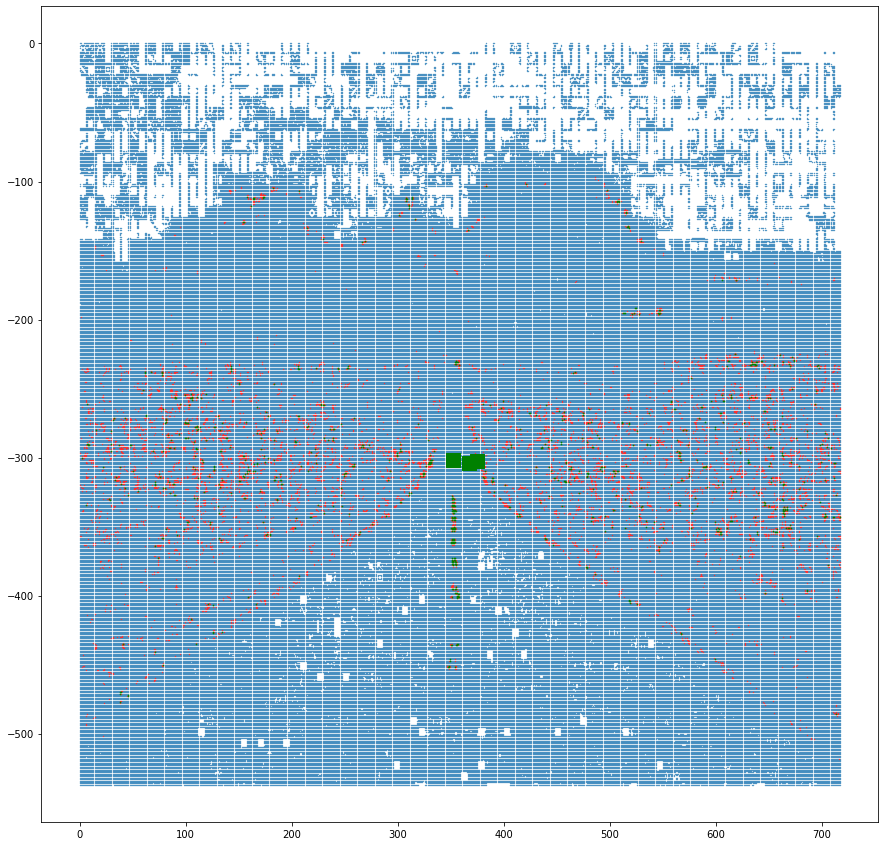

In [405]:
plt.figure(figsize = (15, 15))
plt.scatter(X_1[ : , 0], -X_1[ : , 1], s = 0.5, marker = '.')
plt.scatter(X_2[ : , 0], -X_2[ : , 1], s = 0.5, marker = '.', color = 'red')
plt.scatter(X_3[ : , 0], -X_3[ : , 1], s = 2, marker = '.', color = 'green')
plt.scatter(351.81815089, -302.03877415, s = 200, marker = 's', color = 'green')
plt.scatter(367.38864577, -303.82412774, s = 200, marker = 's', color = 'green')
plt.scatter(374.91990847, -302.46910755, s = 200, marker = 's', color = 'green')

(array([ 11110.,   1924.,   1462.,   1124.,   1015.,   1005.,    931.,
           861.,    794.,    785.,    760.,    780.,    720.,    795.,
           736.,    723.,    746.,    760.,    738.,    739.,    761.,
           772.,    793.,    814.,    817.,    858.,    840.,    863.,
           926.,    947.,    963.,   1035.,   1054.,   1063.,   1081.,
          1236.,   1206.,   1323.,   1399.,   1438.,   1646.,   1752.,
          1930.,   2176., 144418.,  55068.,  31330.,  24773.,  25409.,
         48268.]),
 array([2.12389695e-20, 1.51233851e-04, 3.02467703e-04, 4.53701554e-04,
        6.04935406e-04, 7.56169257e-04, 9.07403109e-04, 1.05863696e-03,
        1.20987081e-03, 1.36110466e-03, 1.51233851e-03, 1.66357237e-03,
        1.81480622e-03, 1.96604007e-03, 2.11727392e-03, 2.26850777e-03,
        2.41974162e-03, 2.57097547e-03, 2.72220933e-03, 2.87344318e-03,
        3.02467703e-03, 3.17591088e-03, 3.32714473e-03, 3.47837858e-03,
        3.62961243e-03, 3.78084629e-03, 3.93208014e-

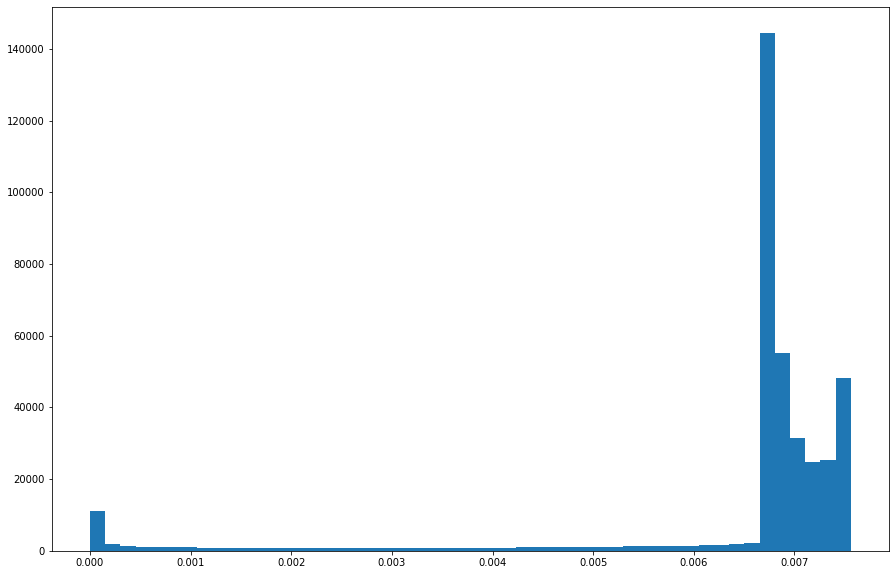

In [100]:
data = l_1
plt.figure(figsize=(15,10))
mean = np.mean(data)
std = np.std(data)
pdf = norm.pdf(data, mean, std)
plt.hist(pdf, bins = 50)

(array([ 28.,   7.,   4.,   2.,   2.,   1.,   2.,   3.,   1.,   0.,   2.,
          2.,   3.,   1.,   4.,   1.,   5.,   1.,   3.,   3.,   3.,   5.,
          4.,   3.,   3.,   2.,   3.,   0.,   6.,   3.,   4.,   3.,   2.,
         19.,  32.,  38.,  42.,  41.,  44.,  32.,  40.,  30.,  24.,  29.,
         33.,  28.,  39.,  39.,  54., 115.]),
 array([3.11773088e-07, 4.17612022e-05, 8.32106313e-05, 1.24660060e-04,
        1.66109490e-04, 2.07558919e-04, 2.49008348e-04, 2.90457777e-04,
        3.31907206e-04, 3.73356635e-04, 4.14806064e-04, 4.56255493e-04,
        4.97704922e-04, 5.39154352e-04, 5.80603781e-04, 6.22053210e-04,
        6.63502639e-04, 7.04952068e-04, 7.46401497e-04, 7.87850926e-04,
        8.29300355e-04, 8.70749785e-04, 9.12199214e-04, 9.53648643e-04,
        9.95098072e-04, 1.03654750e-03, 1.07799693e-03, 1.11944636e-03,
        1.16089579e-03, 1.20234522e-03, 1.24379465e-03, 1.28524408e-03,
        1.32669350e-03, 1.36814293e-03, 1.40959236e-03, 1.45104179e-03,
        1.

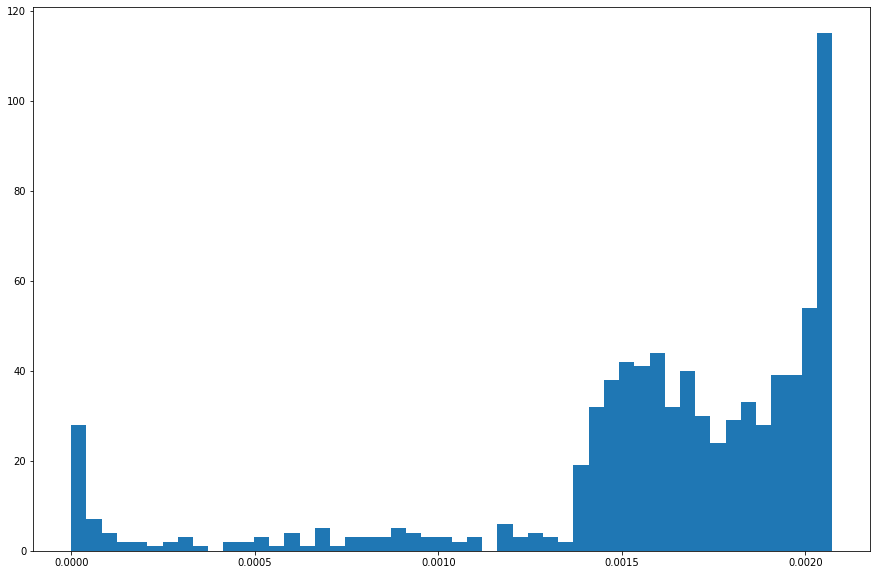

In [99]:
data = l_2
plt.figure(figsize=(15,10))
mean = np.mean(data)
std = np.std(data)
pdf = norm.pdf(data, mean, std)
plt.hist(pdf, bins = 50)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 4.]),
 array([8.64328875e-06, 2.32302422e-05, 3.78171957e-05, 5.24041492e-05,
        6.69911027e-05, 8.15780562e-05, 9.61650097e-05, 1.10751963e-04,
        1.25338917e-04, 1.39925870e-04, 1.54512824e-04, 1.69099777e-04,
        1.83686731e-04, 1.98273684e-04, 2.12860638e-04, 2.27447591e-04,
        2.42034545e-04, 2.56621498e-04, 2.71208452e-04, 2.85795405e-04,
        3.00382358e-04, 3.14969312e-04, 3.29556265e-04, 3.44143219e-04,
        3.58730172e-04, 3.73317126e-04, 3.87904079e-04, 4.02491033e-04,
        4.17077986e-04, 4.31664940e-04, 4.46251893e-04, 4.60838847e-04,
        4.75425800e-04, 4.90012754e-04, 5.04599707e-04, 5.19186661e-04,
        5.33773614e-04, 5.48360568e-04, 5.62947521e-04, 5.77534475e-04,
        5.92121428e-04, 6.06708382e-04, 6.21295335e-04

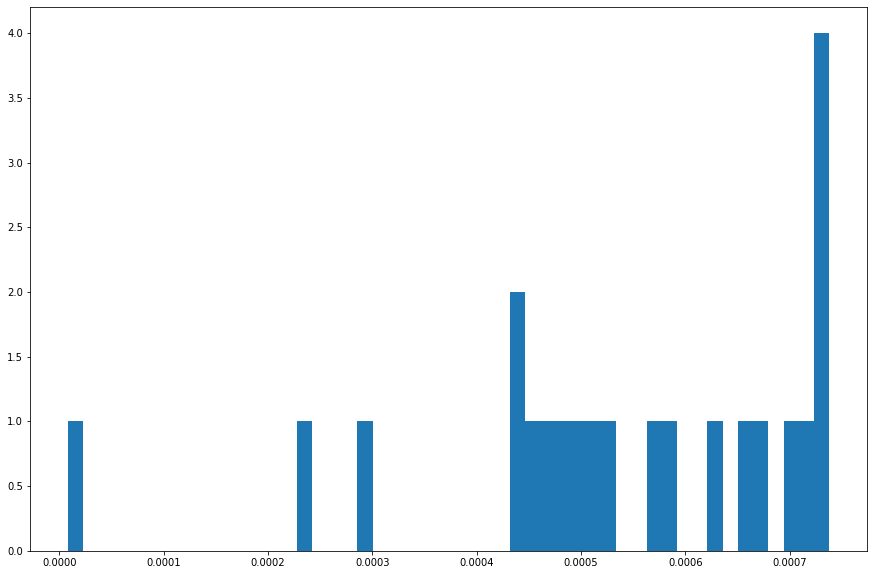

In [98]:
data = l_3
plt.figure(figsize=(15,10))
mean = np.mean(data)
std = np.std(data)
pdf = norm.pdf(data, mean, std)
plt.hist(pdf, bins = 50)

In [34]:
data = pd.read_csv("123.csv")

In [226]:
X = np.empty((len(data), 2))
for i in range(len(data)):
    X[i][0] = data['1'][i]
    X[i][1] = data['2'][i]

In [227]:
Kmean = KMeans(n_clusters=15)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

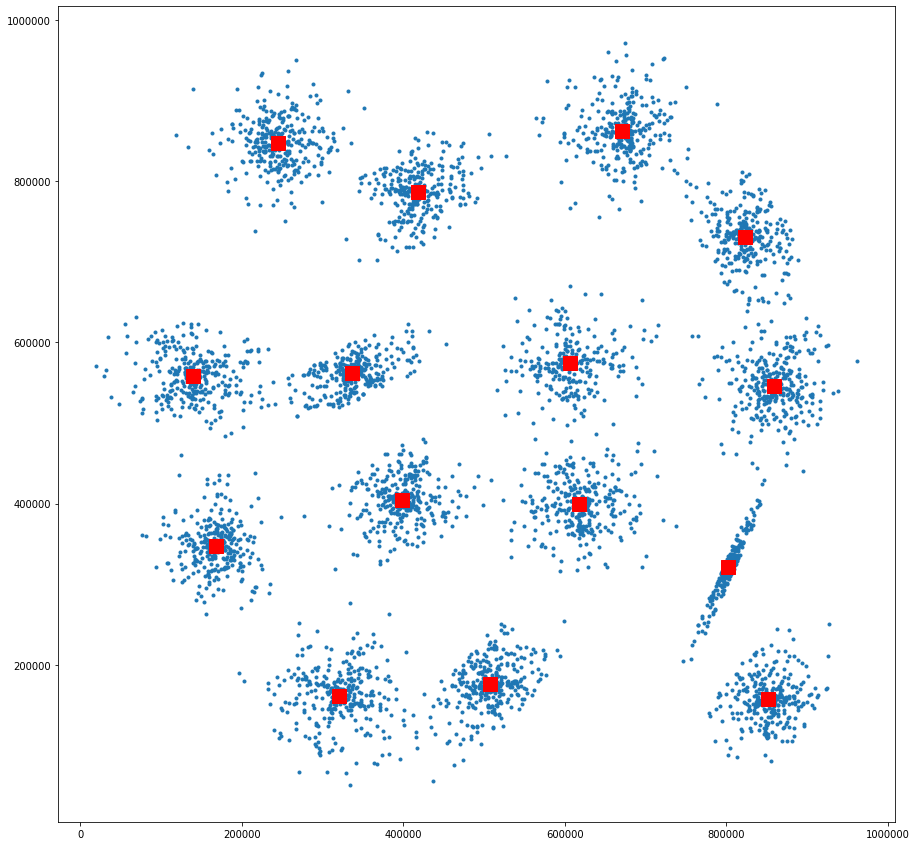

In [228]:
plt.figure(figsize = (15, 15))
plt.scatter(X[ : , 0], X[ : , 1], marker = '.')
for i in range(len(Kmean.cluster_centers_)):
    plt.scatter(Kmean.cluster_centers_[i][0], Kmean.cluster_centers_[i][1], s= 200, color = 'red', marker='s')